In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Cargar los datos
data = pd.read_csv('datos_limpios0.csv')
data = data[data['department'] == 'finishing']
data.drop(columns=['department'], inplace=True)
data.shape

(495, 14)

In [3]:
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,495.000000,495.000000,495.000000,495.0,495.000000,495.000000,495.0,495.0,495.0,495.000000,495.000000
mean,6.347475,0.736970,3.883879,0.0,1922.666667,30.303030,0.0,0.0,0.0,10.189899,0.746293
std,3.462417,0.092135,0.600122,0.0,1793.439506,246.792601,0.0,0.0,0.0,3.940383,0.193918
min,1.000000,0.350000,2.900000,0.0,0.000000,0.000000,0.0,0.0,0.0,2.000000,0.235795
25%,3.000000,0.700000,3.900000,0.0,960.000000,0.000000,0.0,0.0,0.0,8.000000,0.628608
50%,7.000000,0.750000,3.940000,0.0,1440.000000,0.000000,0.0,0.0,0.0,8.000000,0.804417
75%,9.000000,0.800000,4.150000,0.0,1920.000000,0.000000,0.0,0.0,0.0,10.000000,0.902361
max,12.000000,0.800000,5.130000,0.0,15000.000000,3600.000000,0.0,0.0,0.0,28.000000,1.020000


In [4]:
data.drop(columns=['wip', 'idle_time', 'idle_men', 'no_of_style_change'], inplace=True)


In [5]:
data.head()
headers = data.columns.tolist()
headers

['date',
 'quarter',
 'day',
 'team',
 'targeted_productivity',
 'smv',
 'over_time',
 'incentive',
 'no_of_workers',
 'actual_productivity']

**Factores:**
- **Date**: Date in MM-DD-YYYY
- **Quarter**: A portion of the month. A month was divided into four quarters
- **Department**: Associated department with the instance
- **Day**: Day of the Week
- **Team**: Associated team number with the instance
- **Targeted productivity**: Targeted productivity set by the Authority for each team for each day.
- **SMV**: Standard Minute Value, it is the allocated time for a task
- **WIP**: Work in progress. Includes the number of unfinished items for products
- **Over time**: Represents the amount of overtime by each team in minutes
- **Incentive**: Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
- **Idle time**: The amount of time when the production was interrupted due to several reasons
- **Idle men**: The number of workers who were idle due to production interruption
- **No of style change**: Number of changes in the style of a particular product
- **No of workers**: Number of workers in each team

**Variable de respuesta:**
- **Actual productivity**: The actual % of productivity that was delivered by the workers. It ranges from 0-1.



In [6]:
data.head()

,date,quarter,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
1,1/01/2015,Quarter1,Thursday,1,0.75,3.94,960,0,8.0,0.886500
6,1/01/2015,Quarter1,Thursday,2,0.75,3.94,960,0,8.0,0.755167
13,1/01/2015,Quarter1,Thursday,10,0.65,3.94,960,0,8.0,0.705917
14,1/01/2015,Quarter1,Thursday,8,0.75,2.90,960,0,8.0,0.676667
15,1/01/2015,Quarter1,Thursday,4,0.75,3.94,2160,0,18.0,0.593056


In [7]:
# Convertir la columna 'Date' a tipo datetime
data['date'] = pd.to_datetime(data['date'], errors='coerce')


In [8]:
# Extraer día, mes y año de la columna 'Date'
data['Day'] = data['date'].dt.day
data['Month'] = data['date'].dt.month
data['Year'] = data['date'].dt.year

# Eliminar la columna 'Date'
data.drop(columns=['date'], inplace=True)

# Mostrar las primeras filas del DataFrame
data.head()

,quarter,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,Day,Month,Year
1,Quarter1,Thursday,1,0.75,3.94,960,0,8.0,0.886500,1,1,2015
6,Quarter1,Thursday,2,0.75,3.94,960,0,8.0,0.755167,1,1,2015
13,Quarter1,Thursday,10,0.65,3.94,960,0,8.0,0.705917,1,1,2015
14,Quarter1,Thursday,8,0.75,2.90,960,0,8.0,0.676667,1,1,2015
15,Quarter1,Thursday,4,0.75,3.94,2160,0,18.0,0.593056,1,1,2015


In [9]:
# Realizo una copia del DataFrame original
data_encoded = data.copy()

# Codificar las columnas categóricas en la copia
data_encoded['quarter'] = data_encoded['quarter'].astype('category').cat.codes
data_encoded['day'] = data_encoded['day'].astype('category').cat.codes
data_encoded['team'] = data_encoded['team'].astype('category').cat.codes


### Incluir seaborn para Visualización

In [10]:
import seaborn as sns

In [11]:
#sns.pairplot(data_encoded,)

In [12]:
data_encoded.describe()

,quarter,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,Day,Month,Year
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.0
mean,1.422222,2.525253,5.347475,0.736970,3.883879,1922.666667,30.303030,10.189899,0.746293,13.698990,1.725253,2015.0
std,1.234422,1.719991,3.462417,0.092135,0.600122,1793.439506,246.792601,3.940383,0.193918,8.716654,0.769660,0.0
min,0.000000,0.000000,0.000000,0.350000,2.900000,0.000000,0.000000,2.000000,0.235795,1.000000,1.000000,2015.0
25%,0.000000,1.000000,2.000000,0.700000,3.900000,960.000000,0.000000,8.000000,0.628608,7.000000,1.000000,2015.0
50%,1.000000,3.000000,6.000000,0.750000,3.940000,1440.000000,0.000000,8.000000,0.804417,12.000000,2.000000,2015.0
75%,3.000000,4.000000,8.000000,0.800000,4.150000,1920.000000,0.000000,10.000000,0.902361,22.000000,2.000000,2015.0
max,4.000000,5.000000,11.000000,0.800000,5.130000,15000.000000,3600.000000,28.000000,1.020000,31.000000,3.000000,2015.0


### Matriz de correlación

<Axes: >

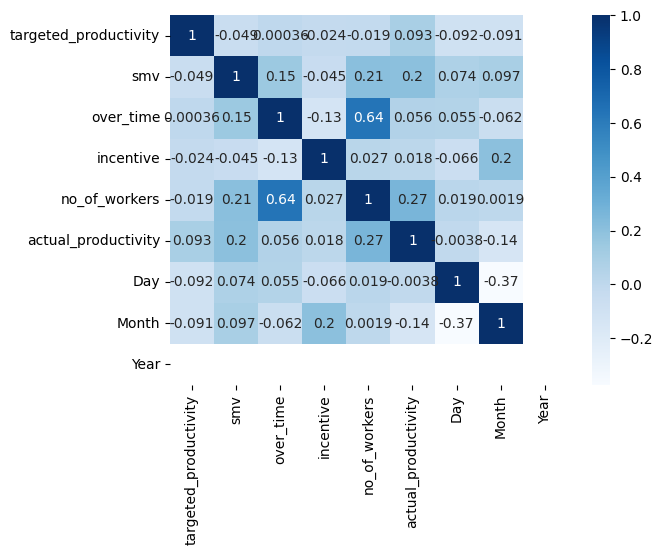

In [13]:
# Excluir columnas no numéricas
numeric_data = data_encoded.select_dtypes(include=[float, int])

# Calcular la matriz de correlación
corr = numeric_data.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


<Axes: >

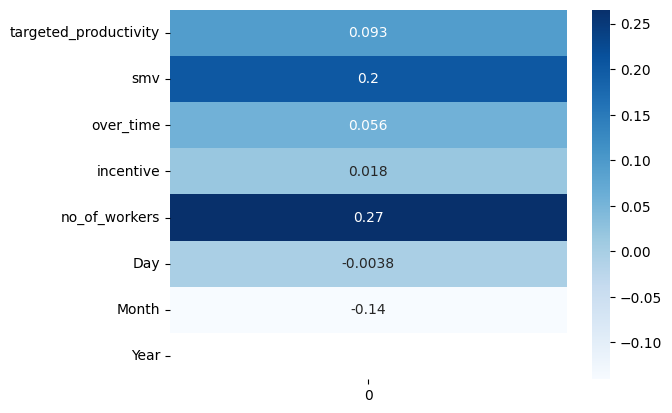

In [14]:
corrw = numeric_data.drop(['actual_productivity'], axis=1).corrwith(data['actual_productivity'])
sns.heatmap(pd.DataFrame(corrw), cmap="Blues", annot=True)

## Normalidad

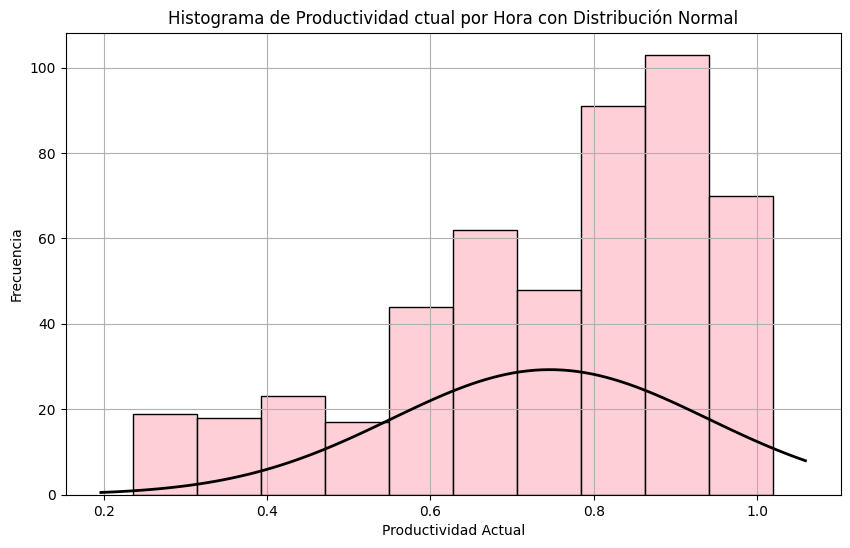

In [15]:
from scipy.stats import norm

# Crear el histograma de la productividad atual
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='actual_productivity', bins=10, kde=False, color='#FFC0CB')

# Calcular la media y desviación estándar de la productividad actual
mean = data['actual_productivity'].mean()
std = data['actual_productivity'].std()

# Crear un rango de valores para la distribución normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)

# Graficar la línea de la distribución normal
plt.plot(x, p * len(data) * (xmax - xmin) / 30, 'k', linewidth=2)

# Añadir etiquetas y título
plt.xlabel('Productividad Actual')
plt.ylabel('Frecuencia')
plt.title('Histograma de Productividad ctual por Hora con Distribución Normal')
plt.grid(True)
plt.show()

In [16]:
from scipy.stats import kstest, norm

# Seleccionar la variable dependiente
actual_prod = data['actual_productivity']

# Realizar la prueba de Kolmogorov-Smirnov
ks_statistic, p_value = kstest(actual_prod, 'norm', args=(actual_prod.mean(), actual_prod.std()))

# Mostrar los resultados
print(f'Estadístico de Kolmogorov-Smirnov: {ks_statistic}')
print(f'Valor p: {p_value}')

# Interpretar el resultado
alpha = 0.05
if p_value < alpha:
    print("La variable dependiente no sigue una distribución normal (rechazar H0)")
else:
    print("La variable dependiente sigue una distribución normal (no rechazar H0)")

Estadístico de Kolmogorov-Smirnov: 0.11911813146961836
Valor p: 1.4097258292793223e-06
La variable dependiente no sigue una distribución normal (rechazar H0)


**Box-Cox transformation**

Estadístico de Kolmogorov-Smirnov: 0.07236591778499224
Valor p: 0.010637825767805708
La variable dependiente no sigue una distribución normal (rechazar H0)


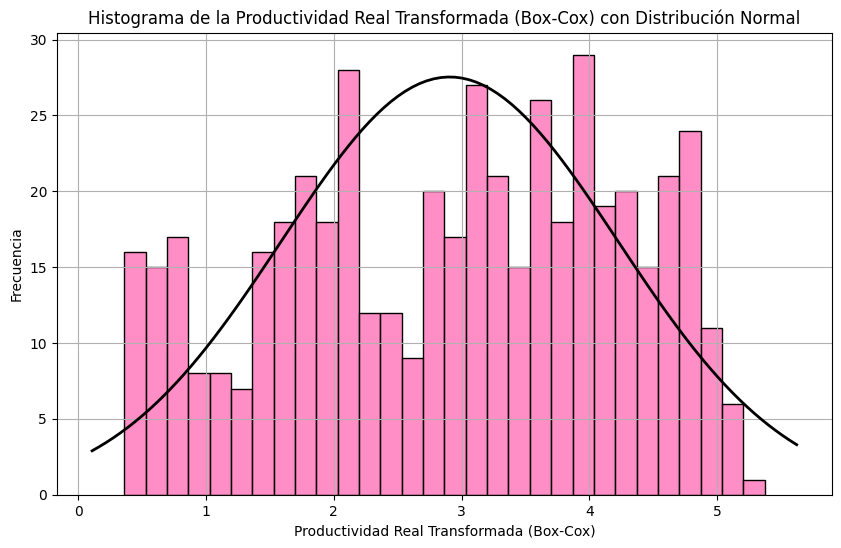

Valor de lambda para la transformación de Box-Cox: 4.625186624328781


In [17]:
from scipy.stats import boxcox, kstest, norm

# Seleccionar la variable dependiente
actual_productivity = data['actual_productivity']

# Aplicar la transformación de Box-Cox
actual_productivity_transformed, lambda_value = boxcox(actual_productivity + 1)  # Añadir 1 para evitar problemas con valores cero

# Añadir la columna transformada al DataFrame
data['actual_productivity_transformed'] = actual_productivity_transformed

# Crear el histograma de la productividad transformada
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='actual_productivity_transformed', bins=30, kde=False, color='#FF69B4')

# Calcular la media y desviación estándar de la productividad transformada
mean_transformed = data['actual_productivity_transformed'].mean()
std_transformed = data['actual_productivity_transformed'].std()

# Realizar la prueba de Kolmogorov-Smirnov
ks_statistic, p_value = kstest(actual_productivity_transformed, 'norm', args=(mean_transformed, std_transformed))

# Mostrar los resultados
print(f'Estadístico de Kolmogorov-Smirnov: {ks_statistic}')
print(f'Valor p: {p_value}')

# Interpretar el resultado
alpha = 0.05
if p_value < alpha:
    print("La variable dependiente no sigue una distribución normal (rechazar H0)")
else:
    print("La variable dependiente sigue una distribución normal (no rechazar H0)")

# Crear un rango de valores para la distribución normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_transformed, std_transformed)

# Graficar la línea de la distribución normal
plt.plot(x, p * len(data) * (xmax - xmin) / 30, 'k', linewidth=2)

# Añadir etiquetas y título
plt.xlabel('Productividad Real Transformada (Box-Cox)')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Productividad Real Transformada (Box-Cox) con Distribución Normal')
plt.grid(True)
plt.show()

# Mostrar el valor de lambda
print(f'Valor de lambda para la transformación de Box-Cox: {lambda_value}')

**Transformacion de raiz cuadrada**

Estadístico de Kolmogorov-Smirnov: 0.8689451623089832
Valor p: 0.0
La variable dependiente no sigue una distribución normal (rechazar H0)


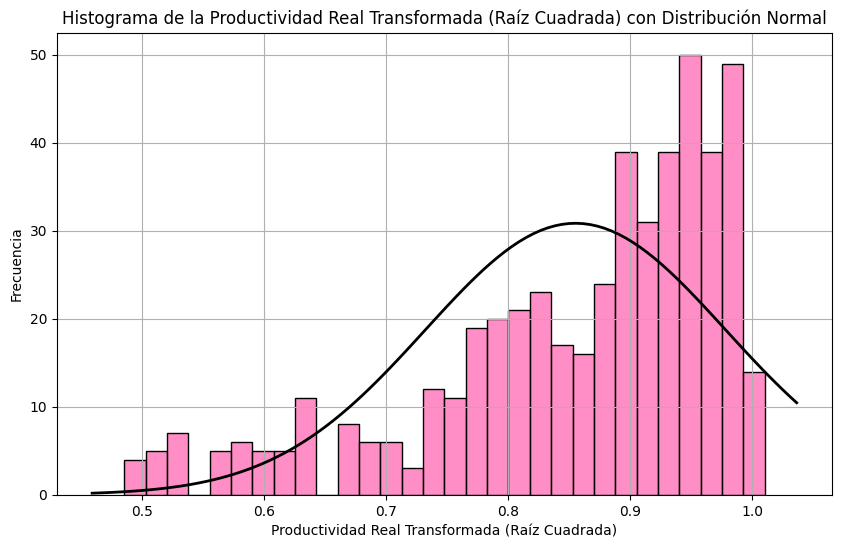

In [18]:
# Seleccionar la variable dependiente
actual_productivity = data['actual_productivity']

# Aplicar la transformación de raíz cuadrada
actual_productivity_transformedSqrt = np.sqrt(actual_productivity)

# Añadir la columna transformada al DataFrame
data['actual_productivity_transformedsqrt'] = actual_productivity_transformedSqrt

# Crear el histograma de la productividad transformada
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='actual_productivity_transformedsqrt', bins=30, kde=False, color='#FF69B4')

# Calcular la media y desviación estándar de la productividad transformada
mean_transformed = data['actual_productivity_transformedsqrt'].mean()
std_transformed = data['actual_productivity_transformedsqrt'].std()

# Realizar la prueba de Kolmogorov-Smirnov
ks_statistic, p_value = kstest(actual_productivity_transformed, 'norm', args=(mean_transformed, std_transformed))

# Mostrar los resultados
print(f'Estadístico de Kolmogorov-Smirnov: {ks_statistic}')
print(f'Valor p: {p_value}')

# Interpretar el resultado
alpha = 0.05
if p_value < alpha:
    print("La variable dependiente no sigue una distribución normal (rechazar H0)")
else:
    print("La variable dependiente sigue una distribución normal (no rechazar H0)")

# Crear un rango de valores para la distribución normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_transformed, std_transformed)

# Graficar la línea de la distribución normal
plt.plot(x, p * len(data) * (xmax - xmin) / 30, 'k', linewidth=2)

# Añadir etiquetas y título
plt.xlabel('Productividad Real Transformada (Raíz Cuadrada)')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Productividad Real Transformada (Raíz Cuadrada) con Distribución Normal')
plt.grid(True)
plt.show()

## Modelo de regresión lineal

$y = \beta_0 + \alpha_1 \times \text{Quarter} + \alpha_2 \times \text{Day} + \alpha_4 \times \text{Team} + \beta_1 \times \text{Targeted Productivity} + \beta_2 \times \text{SMW} + \beta_3 \times \text{WIP} + \beta_4 \times \text{Over time} + \beta_5 \times \text{Incentive} + \beta_6 \times \text{Idle Time} + \beta_7 \times \text{Idle men} + \beta_8 \times \text{No Of Style Change} + \beta_9 \times \text{No Of Workers} + \alpha_5 \times \text{Day} + \alpha_6 \times \text{Month} + \alpha_7 \times \text{Year}$

In [19]:
data_encoded.columns.tolist()

['quarter',
 'day',
 'team',
 'targeted_productivity',
 'smv',
 'over_time',
 'incentive',
 'no_of_workers',
 'actual_productivity',
 'Day',
 'Month',
 'Year']

**Variables Explicativas**

In [20]:
features = ['quarter', 'day', 'team', 'targeted_productivity', 'smv', 'over_time', 'incentive', 'no_of_workers','Day', 'Month', 'Year']

X = data_encoded[features]
X = pd.get_dummies(X, columns=['day', 'team', 'quarter'], dtype=int, drop_first=True)

X.head()

,targeted_productivity,smv,over_time,incentive,no_of_workers,Day,Month,Year,day_1,day_2,...,team_6,team_7,team_8,team_9,team_10,team_11,quarter_1,quarter_2,quarter_3,quarter_4
1,0.75,3.94,960,0,8.0,1,1,2015,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.75,3.94,960,0,8.0,1,1,2015,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0.65,3.94,960,0,8.0,1,1,2015,0,0,...,0,0,0,1,0,0,0,0,0,0
14,0.75,2.90,960,0,8.0,1,1,2015,0,0,...,0,1,0,0,0,0,0,0,0,0
15,0.75,3.94,2160,0,18.0,1,1,2015,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
X.shape

(495, 28)

**Variable de respuesta**

In [22]:
Y = data_encoded["actual_productivity"]

Y.head()


1     0.886500
6     0.755167
13    0.705917
14    0.676667
15    0.593056
Name: actual_productivity, dtype: float64

### Modelo con todas las variables

In [23]:
from sklearn import metrics
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

In [24]:
# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS)
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.287
Model:                             OLS   Adj. R-squared:                  0.235
Method:                  Least Squares   F-statistic:                     5.494
Date:                 Thu, 17 Oct 2024   Prob (F-statistic):           3.28e-15
Time:                         10:22:40   Log-Likelihood:                 149.15
No. Observations:                  396   AIC:                            -242.3
Df Residuals:                      368   BIC:                            -130.8
Df Model:                           27                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
targeted_productivit

## Verificacion de problemas en el Modelo Lineal

#### Verificacion de multicolinealidad con estos datos

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Agrega una columna constante al DataFrame si aún no está presente
# Esto es necesario para calcular el VIF correctamente
df_with_const = add_constant(X)

# Calcula el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Filtra solo las filas correspondientes a las variables explicativas (no la constante)
vif_data = vif_data[vif_data["Variable"] != "const"]

# Imprime los resultados
print(vif_data)

                 Variable         VIF
0   targeted_productivity    1.159662
1                     smv    1.750555
2               over_time    2.007789
3               incentive    1.230220
4           no_of_workers    1.912055
5                     Day   32.589678
6                   Month    1.415131
7                    Year  196.599933
8                   day_1    1.974511
9                   day_2    1.863787
10                  day_3    1.905388
11                  day_4    1.819593
12                  day_5    2.053086
13                 team_1    1.834647
14                 team_2    1.720966
15                 team_3    1.863848
16                 team_4    1.706927
17                 team_5    2.005636
18                 team_6    1.722223
19                 team_7    1.913809
20                 team_8    1.858078
21                 team_9    1.791628
22                team_10    1.559842
23                team_11    1.765655
24              quarter_1    5.351670
25          

El modelo presenta un problema de multicolinealidad, por lo que se debe realizar un análisis de componentes principales para reducir la dimensionalidad de los datos.

La multicolinealidad imperfecta ocurre cuando las columnas de la matriz XTX son casi linealmente
dependientes, lo que resulta en un determinante cercano a cero. Esto implica que es posible calcular la
inversa de la matriz, pero los valores resultantes serán muy grandes en valor absoluto. Para abordar este
problema, se propone eliminar las variables que presenten la mayor correlación entre sí. Posteriormente,
se puede recalcular el factor de inflación de la varianza (VIF) en el nuevo modelo sin estas variables para
determinar si se ha resuelto el problema de multicolinealidad imperfecta. En este modelo en especifico al
determinar la matriz de correlación entre las variables se obtuvo el siguiente resultado:

In [26]:
X_reduced = X.drop(columns=['Year', 'Day'])
# Esto es necesario para calcular el VIF correctamente
df_with_const = add_constant(X_reduced)

# Calcula el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Filtra solo las filas correspondientes a las variables explicativas (no la constante)
vif_data = vif_data[vif_data["Variable"] != "const"]

# Imprime los resultados
print(vif_data)


                 Variable       VIF
1   targeted_productivity  1.159571
2                     smv  1.750554
3               over_time  1.993480
4               incentive  1.227398
5           no_of_workers  1.910806
6                   Month  1.304837
7                   day_1  1.872374
8                   day_2  1.797979
9                   day_3  1.901214
10                  day_4  1.772336
11                  day_5  1.824738
12                 team_1  1.834598
13                 team_2  1.720966
14                 team_3  1.863811
15                 team_4  1.705178
16                 team_5  2.005635
17                 team_6  1.721106
18                 team_7  1.913750
19                 team_8  1.857778
20                 team_9  1.791020
21                team_10  1.559728
22                team_11  1.765482
23              quarter_1  1.501153
24              quarter_2  1.453758
25              quarter_3  1.549519
26              quarter_4  1.320802


<Axes: >

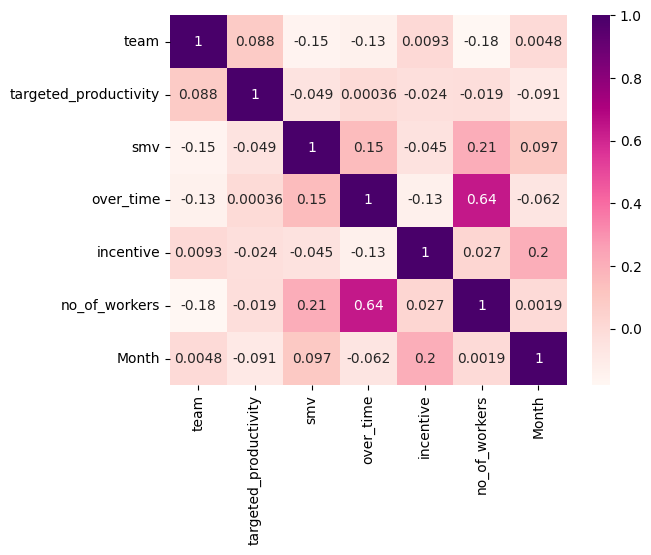

In [27]:
numeric_data = data.select_dtypes(include=[float, int])

numeric_data_without_target = numeric_data.drop(columns=['actual_productivity', 'Day', 'Year', 'actual_productivity_transformed', 'actual_productivity_transformed','actual_productivity_transformedsqrt'])

# Calcular la matriz de correlación
corr = numeric_data_without_target.corr()
sns.heatmap(corr, cmap="RdPu", annot=True)

In [28]:
X_reduced.head()

,targeted_productivity,smv,over_time,incentive,no_of_workers,Month,day_1,day_2,day_3,day_4,...,team_6,team_7,team_8,team_9,team_10,team_11,quarter_1,quarter_2,quarter_3,quarter_4
1,0.75,3.94,960,0,8.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0.75,3.94,960,0,8.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13,0.65,3.94,960,0,8.0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
14,0.75,2.90,960,0,8.0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
15,0.75,3.94,2160,0,18.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Homocedasticidad

In [29]:
### Modelo con las variables sin multicolinealidad
# nombres de características

features = ['quarter', 'day', 'team', 'targeted_productivity', 'smv', 'over_time',
            'incentive', 'no_of_workers', 'Month']

X_Reduced = data_encoded[features]
X_Reduced = pd.get_dummies(X_Reduced, columns=['day', 'team', 'quarter', 'Month'], dtype=int, drop_first=True)

X_Reduced.head()

,targeted_productivity,smv,over_time,incentive,no_of_workers,day_1,day_2,day_3,day_4,day_5,...,team_8,team_9,team_10,team_11,quarter_1,quarter_2,quarter_3,quarter_4,Month_2,Month_3
1,0.75,3.94,960,0,8.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.75,3.94,960,0,8.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0.65,3.94,960,0,8.0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
14,0.75,2.90,960,0,8.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0.75,3.94,2160,0,18.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
X_trainSM, X_test, y_train, y_test = train_test_split(X_Reduced, Y, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_trainSM = sm.add_constant(X_trainSM)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS)
modelSM = sm.OLS(y_train, X_trainSM).fit()

# resumen de resultados
print(modelSM.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.291
Model:                             OLS   Adj. R-squared:                  0.239
Method:                  Least Squares   F-statistic:                     5.585
Date:                 Thu, 17 Oct 2024   Prob (F-statistic):           1.57e-15
Time:                         10:22:43   Log-Likelihood:                 150.09
No. Observations:                  396   AIC:                            -244.2
Df Residuals:                      368   BIC:                            -132.7
Df Model:                           27                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [31]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(modelSM.resid, modelSM.model.exog)

# Extraer los resultados del test
bp_test_stat = bp_test[0]
bp_test_pvalue = bp_test[1]
bp_test_fvalue = bp_test[2]
bp_test_f_pvalue = bp_test[3]

# Imprimir los resultados
print(f"Breusch-Pagan Test Statistic: {bp_test_stat}")
print(f"Breusch-Pagan Test p-value: {bp_test_pvalue}")
print(f"Breusch-Pagan Test F-Statistic: {bp_test_fvalue}")
print(f"Breusch-Pagan Test F p-value: {bp_test_f_pvalue}")

Breusch-Pagan Test Statistic: 31.647370887937186
Breusch-Pagan Test p-value: 0.2453959115885616
Breusch-Pagan Test F-Statistic: 1.1838584642720942
Breusch-Pagan Test F p-value: 0.2441896309634997


Como su p-value es mayor a la significancia 0.05, se acepta la hipótesis nula de homocedasticidad, es decir, la varianza de los errores es constante.

## Verificacion de Especificación con estos datos

In [32]:
### Modelo con las variables significativas
# nombres de características
features = ['quarter', 'day', 'team', 'targeted_productivity', 'smv', 'over_time',
            'incentive', 'no_of_workers', 'Month']

X_Reduced = data_encoded[features]
X_Reduced = pd.get_dummies(X_Reduced, columns=['day', 'team', 'quarter', 'Month'], dtype=int, drop_first=True)

X_trainES, X_test, y_trainES, y_test = train_test_split(X_Reduced, Y, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_trainES = sm.add_constant(X_trainES)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS)
modelES = sm.OLS(y_trainES, X_trainES).fit()

# resumen de resultados
print(modelES.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.291
Model:                             OLS   Adj. R-squared:                  0.239
Method:                  Least Squares   F-statistic:                     5.585
Date:                 Thu, 17 Oct 2024   Prob (F-statistic):           1.57e-15
Time:                         10:22:43   Log-Likelihood:                 150.09
No. Observations:                  396   AIC:                            -244.2
Df Residuals:                      368   BIC:                            -132.7
Df Model:                           27                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [33]:
from statsmodels.stats.diagnostic import linear_reset


reset_test = linear_reset(modelES, power=2, use_f=True)

# Imprimir los resultados del test
print(reset_test)

<F test: F=10.83311286650462, p=0.001093706122526398, df_denom=367, df_num=1>


Ya que el p-value es menor a 0,05 se rechaza la hipótesis nula, por lo cual el modelo presenta problemas de Especificacion.

## Verificacion de Autocorrelacion

In [34]:
### Modelo con las variables significativas
# nombres de características
features = ['quarter', 'day', 'team', 'targeted_productivity', 'smv', 'over_time',
            'incentive', 'no_of_workers', 'Month']

X_Reduced = data_encoded[features]
X_Reduced = pd.get_dummies(X_Reduced, columns=['day', 'team', 'quarter', 'Month'], dtype=int, drop_first=True)

X_trainAUT, X_test, y_trainAUT, y_test = train_test_split(X_Reduced, Y, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_trainAUT = sm.add_constant(X_trainAUT)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS)
modelES = sm.OLS(y_trainAUT, X_trainAUT).fit()

# resumen de resultados
print(modelES.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.291
Model:                             OLS   Adj. R-squared:                  0.239
Method:                  Least Squares   F-statistic:                     5.585
Date:                 Thu, 17 Oct 2024   Prob (F-statistic):           1.57e-15
Time:                         10:22:43   Log-Likelihood:                 150.09
No. Observations:                  396   AIC:                            -244.2
Df Residuals:                      368   BIC:                            -132.7
Df Model:                           27                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

El estadistico de Durbin-Watson esta cercano a dos (2) (1.942), por lo que no se tiene problemas de autocorrelación.

## Modelo Sin Multicolinealidad y con las variables significativas

In [35]:
# Nombres de características que no causan multicolinealidad
features = ['quarter', 'day', 'team', 'targeted_productivity', 'smv', 'over_time',
            'incentive', 'no_of_workers', 'Month']

# Seleccionar las variables significativas
X_AfterTest = data_encoded[features]

# Convertir variables categóricas a variables dummy
X_AfterTest= pd.get_dummies(X_AfterTest, columns=['day', 'team', 'quarter', 'Month'], dtype=int, drop_first=True)


In [36]:
y = data['actual_productivity']

In [37]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_trainR, X_testR, y_trainR, y_testR = train_test_split(X_AfterTest, y, random_state=1, test_size=0.2)

# Agregar constante explícitamente
X_trainR = sm.add_constant(X_trainR)

In [38]:
# Ajustar el modelo inicial
modelCompleto = sm.OLS(y_trainR, X_trainR).fit()

# Imprimir el resumen del modelo inicial
print(modelCompleto.summary())


                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.291
Model:                             OLS   Adj. R-squared:                  0.239
Method:                  Least Squares   F-statistic:                     5.585
Date:                 Thu, 17 Oct 2024   Prob (F-statistic):           1.57e-15
Time:                         10:22:44   Log-Likelihood:                 150.09
No. Observations:                  396   AIC:                            -244.2
Df Residuals:                      368   BIC:                            -132.7
Df Model:                           27                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [39]:
# Identificar variables no significativas (p > 0.05)
variables_no_significativas = modelCompleto.pvalues[modelCompleto.pvalues > 0.05].index.tolist()
variables_no_significativas

['smv',
 'incentive',
 'day_1',
 'day_2',
 'day_3',
 'day_4',
 'day_5',
 'team_2',
 'team_4',
 'team_11',
 'quarter_1',
 'quarter_3']

In [40]:
# Eliminar variables no significativas
X_Final = X_AfterTest.drop(columns = variables_no_significativas)
X_train_reduced = X_trainR.drop(columns = variables_no_significativas)
X_test_reduced = X_testR.drop(columns = variables_no_significativas)

# Modelo final regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS)
model_MasReducido = sm.OLS(y_trainR, X_train_reduced).fit()

# Imprimir el resumen del modelo final
print(model_MasReducido.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.275
Model:                             OLS   Adj. R-squared:                  0.247
Method:                  Least Squares   F-statistic:                     9.627
Date:                 Thu, 17 Oct 2024   Prob (F-statistic):           2.61e-19
Time:                         10:22:44   Log-Likelihood:                 145.86
No. Observations:                  396   AIC:                            -259.7
Df Residuals:                      380   BIC:                            -196.0
Df Model:                           15                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [41]:
# Identificar variables no significativas (p > 0.05)
variables_no_significativas2 = model_MasReducido.pvalues[model_MasReducido.pvalues > 0.05].index.tolist()
variables_no_significativas2

['team_3', 'quarter_2']

In [42]:
# Eliminar variables no significativas
X_FinalMinimo = X_Final.drop(columns = variables_no_significativas2)
X_train_minimal = X_train_reduced.drop(columns = variables_no_significativas2)
X_test_minimal = X_test_reduced.drop(columns = variables_no_significativas2)

# Modelo final regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS)
model_Final = sm.OLS(y_trainR, X_train_minimal).fit()

# Imprimir el resumen del modelo final
print(model_Final.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.264
Model:                             OLS   Adj. R-squared:                  0.239
Method:                  Least Squares   F-statistic:                     10.55
Date:                 Thu, 17 Oct 2024   Prob (F-statistic):           3.46e-19
Time:                         10:22:44   Log-Likelihood:                 142.82
No. Observations:                  396   AIC:                            -257.6
Df Residuals:                      382   BIC:                            -201.9
Df Model:                           13                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [43]:
variables_no_significativas3 = model_Final.pvalues[model_MasReducido.pvalues > 0.05].index.tolist()
variables_no_significativas3

[]

## Resumen Variables de Interes

In [44]:
coeficients = model_Final.params
print(coeficients)

const                    0.513118
targeted_productivity    0.222213
over_time               -0.000027
no_of_workers            0.021662
team_1                  -0.059052
team_5                  -0.161213
team_6                  -0.130291
team_7                  -0.110574
team_8                  -0.081751
team_9                  -0.108741
team_10                 -0.127717
quarter_4                0.131932
Month_2                 -0.084448
Month_3                 -0.076847
dtype: float64


### R cuadrado del modelo

In [45]:
print(model_Final.rsquared, model_Final.rsquared_adj)

0.264152376327755 0.23911044149074145


## Ahora usando usando SKLearn

In [46]:
from sklearn.model_selection import train_test_split

X_trainSK, X_testSK, y_trainSK, y_testSK = train_test_split(X_AfterTest, y, random_state=1,test_size=0.2)

In [47]:
# tamaños
print(X_trainSK.shape)
print(y_trainSK.shape)
print(X_testSK.shape)
print(y_testSK.shape)

(396, 27)
(396,)
(99, 27)
(99,)


In [48]:
print(X_AfterTest.head())
print(X_trainSK.head())

    targeted_productivity   smv  over_time  incentive  no_of_workers  day_1  \
1                    0.75  3.94        960          0            8.0      0   
6                    0.75  3.94        960          0            8.0      0   
13                   0.65  3.94        960          0            8.0      0   
14                   0.75  2.90        960          0            8.0      0   
15                   0.75  3.94       2160          0           18.0      0   

    day_2  day_3  day_4  day_5  ...  team_8  team_9  team_10  team_11  \
1       0      1      0      0  ...       0       0        0        0   
6       0      1      0      0  ...       0       0        0        0   
13      0      1      0      0  ...       0       1        0        0   
14      0      1      0      0  ...       0       0        0        0   
15      0      1      0      0  ...       0       0        0        0   

    quarter_1  quarter_2  quarter_3  quarter_4  Month_2  Month_3  
1           0      

In [49]:
from sklearn.linear_model import LinearRegression

# crear el objeto del modelo
linreg = LinearRegression()

# ajustar los parámetros del modelo usando los datos de entrenamiento
linreg.fit(X_trainSK, y_trainSK)

LinearRegression()

In [50]:
# imprimir coeficientes
print(linreg.intercept_)
print(linreg.coef_)

0.48449691208830925
[ 2.04426910e-01  2.56833562e-02 -2.83293208e-05 -3.25248015e-05
  2.34754721e-02 -2.37383513e-04 -2.11942154e-02 -1.61016325e-02
 -1.83121963e-04 -1.83496951e-02 -9.84689620e-02 -5.04485496e-02
 -9.24185548e-02 -3.17402827e-02 -1.60957013e-01 -1.64707928e-01
 -1.41951143e-01 -1.06415004e-01 -1.38592843e-01 -1.54710200e-01
 -5.15645081e-02 -1.11439670e-02 -6.68003895e-02 -4.59260435e-02
  1.04979267e-01 -8.81032006e-02 -9.35113896e-02]


In [51]:
# coeficientes con nombre de las características
list(zip(features, linreg.coef_))

[('quarter', 0.20442691000471644),
 ('day', 0.02568335622084042),
 ('team', -2.8329320814562744e-05),
 ('targeted_productivity', -3.252480151974737e-05),
 ('smv', 0.02347547207486575),
 ('over_time', -0.00023738351254438367),
 ('incentive', -0.021194215398431297),
 ('no_of_workers', -0.016101632538510532),
 ('Month', -0.00018312196269266277)]

### Predicciones usando los datos de prueba

In [52]:
y_predSK = linreg.predict(X_testSK)

In [53]:
from sklearn import metrics

# mean absolute error
MAE = metrics.mean_absolute_error(y_testSK, y_predSK)

# mean squared error
MSE = metrics.mean_squared_error(y_testSK, y_predSK)

# root mean squared error
RMSE = np.sqrt(MSE)

In [54]:
print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  0.14303712272062194
MSE:  0.031797437213038134
RMSE:  0.17831835915866356


### Validacion cruzada

In [55]:
from sklearn.model_selection import cross_val_score

# usar MSE - error cuadrático medio
scores = cross_val_score(linreg, X_AfterTest, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = - scores
print(mse_scores)

[0.02325527 0.03838819 0.0395916  0.04037246 0.03972486]


In [56]:
# calcular RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[0.1524968  0.19592904 0.19897638 0.200929   0.19931097]


In [57]:
# MSE y RMSE promedio a través de todos los grupos
print("MSE Promedio", mse_scores.mean())
print("RMSE Promedio", rmse_scores.mean())

MSE Promedio 0.03626647786223562
RMSE Promedio 0.18952843833243702


## Determinar puntos de alta influencia con distancias de Cook y umbral de $4/n$

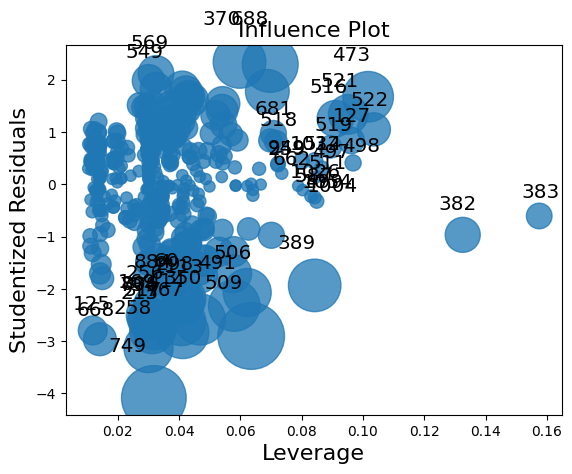

In [58]:
fig = sm.graphics.influence_plot(model_Final, criterion="cooks")

In [59]:
# disntacia de Cook
model_cooksd = model_Final.get_influence().cooks_distance[0]

# get length of df to obtain n
n = X_trainR.shape[0]

# umbral
critical_d = 4/n
print('Umbral con distancia de Cook:', critical_d)

# puntos que podrían ser ourliers con alta influencia
out_d = model_cooksd > critical_d

print(X_trainR.index[out_d], "\n", model_cooksd[out_d])

Umbral con distancia de Cook: 0.010101010101010102
Index([ 884,  215,  169,  371,  298,  317, 1113,  688,  389,  382, 1091, 1159,
        749,  491,  506,  569,   60,  521,  256,  414,  509,  806,  350,  767,
        516,  734,  656,  258,  370,  473],
      dtype='int64') 
 [0.01046646 0.01786068 0.01329315 0.01656237 0.01490953 0.01741272
 0.01567453 0.02780813 0.02440326 0.01022053 0.0126021  0.01059321
 0.03760459 0.023393   0.02014187 0.0106556  0.01340173 0.01338214
 0.01223349 0.0206086  0.04002325 0.01448845 0.02308436 0.02419124
 0.01121235 0.01451417 0.01017303 0.02122208 0.02452795 0.02251346]


In [60]:
X_trainR[out_d]

,const,targeted_productivity,smv,over_time,incentive,no_of_workers,day_1,day_2,day_3,day_4,...,team_8,team_9,team_10,team_11,quarter_1,quarter_2,quarter_3,quarter_4,Month_2,Month_3
884,1.0,0.70,3.90,960,0,8.0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
215,1.0,0.80,3.94,1440,0,8.0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
169,1.0,0.50,4.15,1440,0,8.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
371,1.0,0.75,3.94,8400,0,14.0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
298,1.0,0.80,4.15,1260,0,7.0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
317,1.0,0.70,3.94,1440,0,8.0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
1113,1.0,0.65,3.90,0,960,8.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
688,1.0,0.35,4.15,1440,0,12.0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
389,1.0,0.70,3.94,12000,0,20.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
382,1.0,0.70,3.94,15000,0,25.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


### Modelo sin la observación 383

In [61]:
# Eliminar la instancia 614
X_train_dropx = X_train_minimal.drop(index = 383)
Y_train_dropy = y_trainR.drop(index = 383)

# agregar constante explíticamente
new_model = sm.OLS(Y_train_dropy, X_train_dropx).fit()

print(new_model.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.264
Model:                             OLS   Adj. R-squared:                  0.239
Method:                  Least Squares   F-statistic:                     10.53
Date:                 Thu, 17 Oct 2024   Prob (F-statistic):           3.74e-19
Time:                         10:22:45   Log-Likelihood:                 142.15
No. Observations:                  395   AIC:                            -256.3
Df Residuals:                      381   BIC:                            -200.6
Df Model:                           13                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [62]:
variables_no_significativas_SinObs = new_model.pvalues[new_model.pvalues > 0.05].index.tolist()
variables_no_significativas_SinObs

['team_1']

In [63]:
# Eliminar variables no significativas
X_FinalSMS = X_FinalMinimo.drop(columns = variables_no_significativas_SinObs)
X_train_SMS = X_train_minimal.drop(columns = variables_no_significativas_SinObs)
X_test_SMS = X_test_minimal.drop(columns = variables_no_significativas_SinObs)

# Modelo final regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS)
model_FinalSMS = sm.OLS(y_trainR, X_train_SMS).fit()

# Imprimir el resumen del modelo final
print(model_FinalSMS.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.257
Model:                             OLS   Adj. R-squared:                  0.234
Method:                  Least Squares   F-statistic:                     11.04
Date:                 Thu, 17 Oct 2024   Prob (F-statistic):           5.63e-19
Time:                         10:22:45   Log-Likelihood:                 140.89
No. Observations:                  396   AIC:                            -255.8
Df Residuals:                      383   BIC:                            -204.0
Df Model:                           12                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

### Resumen variables de interes sin la instancia 383

In [64]:
# Suponiendo que coeficients y coeficientesRed ya están definidos
coeficientesRedSMS = model_FinalSMS.params

# Crear un DataFrame con los coeficientes
df = pd.DataFrame({
    'Coeficientes Modelo Reducido': coeficientesRedSMS
})

# Imprimir la tabla
print(df)

                       Coeficientes Modelo Reducido
const                                      0.507746
targeted_productivity                      0.213321
over_time                                 -0.000026
no_of_workers                              0.021483
team_5                                    -0.149555
team_6                                    -0.118308
team_7                                    -0.098715
team_8                                    -0.069269
team_9                                    -0.096526
team_10                                   -0.115734
quarter_4                                  0.135515
Month_2                                   -0.083392
Month_3                                   -0.076743


In [65]:
print(model_FinalSMS.rsquared, model_FinalSMS.rsquared_adj)

0.2569249773653882 0.23364325341861192


In [66]:
print("\nComparación de R^2 y R^2 ajustado:")
print(f"R^2 con la instancia 383: {model_Final.rsquared}")
print(f"R^2 ajustado con la instancia 383: {model_Final.rsquared_adj}")
print(f"R^2 sin la instancia 383: {model_FinalSMS.rsquared}")
print(f"R^2 ajustado sin la instancia 383: {model_FinalSMS.rsquared_adj}")


Comparación de R^2 y R^2 ajustado:
R^2 con la instancia 383: 0.264152376327755
R^2 ajustado con la instancia 383: 0.23911044149074145
R^2 sin la instancia 383: 0.2569249773653882
R^2 ajustado sin la instancia 383: 0.23364325341861192
